**Importing libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

**Reading Dataset**

In [2]:
path = 'dataset_sdn.csv'
df = pd.read_csv (path)
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [3]:
df.shape

(65535, 23)

In [4]:
df.dtypes

dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [5]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           65535 non-null  int64  
 1   switch       65535 non-null  int64  
 2   src          65535 non-null  object 
 3   dst          65535 non-null  object 
 4   pktcount     65535 non-null  int64  
 5   bytecount    65535 non-null  int64  
 6   dur          65535 non-null  int64  
 7   dur_nsec     65535 non-null  int64  
 8   tot_dur      65535 non-null  float64
 9   flows        65535 non-null  int64  
 10  packetins    65535 non-null  int64  
 11  pktperflow   65535 non-null  int64  
 12  byteperflow  65535 non-null  int64  
 13  pktrate      65535 non-null  int64  
 14  Pairflow     65535 non-null  int64  
 15  Protocol     65535 non-null  object 
 16  port_no      65535 non-null  int64  
 17  tx_bytes     65535 non-null  int64  
 18  rx_bytes     65535 non-null  int64  
 19  tx_k

In [7]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,6.553500e+04,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,65535.000000,65535.000000,65535.000000,6.553500e+04,6.553500e+04,65535.000000,65029.000000,65029.000000,65535.000000
mean,17480.554269,3.976135,59153.597498,4.989632e+07,286.504906,4.527339e+08,2.868819e+11,5.055512,4492.062943,7346.252110,6.319576e+06,244.380606,0.487480,2.286610,8.611208e+07,8.613589e+07,1058.324529,1066.610036,2133.169540,0.445380
std,11342.682041,1.875479,50077.228701,5.050622e+07,257.979944,2.588676e+08,2.578394e+11,2.799486,4380.384425,7181.274977,7.766330e+06,239.394251,0.499847,1.047005,1.572864e+08,1.345788e+08,2577.331672,2167.836392,3269.478654,0.497012
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-129952.000000,-1.372656e+08,-4332.000000,0.000000,1.000000,2.668000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,9876.000000,3.000000,7078.000000,1.646042e+06,113.000000,2.480000e+08,1.130000e+11,3.000000,1931.000000,30.000000,2.940000e+03,1.000000,0.000000,1.000000,3.966000e+03,3.185000e+03,0.000000,0.000000,0.000000,0.000000
50%,11605.000000,4.000000,54212.000000,3.382034e+07,229.000000,4.140000e+08,2.290000e+11,4.000000,2390.000000,8973.000000,7.743102e+06,299.000000,0.000000,2.000000,1.914300e+04,2.353196e+06,0.000000,0.000000,4.000000,0.000000
75%,29052.000000,5.000000,101125.500000,9.530966e+07,358.000000,6.710000e+08,3.590000e+11,6.000000,6696.000000,13401.000000,1.426841e+07,446.000000,1.000000,3.000000,1.352287e+08,1.359223e+08,227.000000,801.000000,3838.000000,1.000000
max,34623.000000,10.000000,260001.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,18351.000000,18890.000000,1.493182e+07,629.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


**Preprocessing Data and Cleaning**

In [8]:
to_drop = ['dt']
df = df.drop(to_drop, axis='columns')
df = df[df['pktrate'] !=0]

In [9]:
# Getting last two digits from src and dst
df['src'] = [int(i.split('.')[3]) for i in df['src']]
df['dst'] = [int(i.split('.')[3]) for i in df['dst']]
df['switch'] = df['switch'].astype(str) 
df['src'] = df['src'].astype(str)
df['dst'] = df['dst'].astype(str)
df['port_no'] = df['port_no'].astype(str)
df['Protocol'] = df['Protocol'].astype(str)
new_df = df

In [10]:
# checking for null values
df.isnull().sum()

switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        463
tot_kbps       463
label            0
dtype: int64

In [11]:
new_df.fillna(new_df.mean(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5116\1150111414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.fillna(new_df.mean(), inplace=True)


In [12]:
new_df

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,1943,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,1943,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,4,7,2,273,26754,279,905000000,2.800000e+11,13,2053,...,1,1,ICMP,1,448258001,447847188,5174,5174.0,10348.0,0
65531,4,7,2,273,26754,279,905000000,2.800000e+11,13,2053,...,1,1,ICMP,3,176660809,239051503,5171,2592.0,7763.0,0
65532,4,7,2,273,26754,279,905000000,2.800000e+11,13,2053,...,1,1,ICMP,2,271194791,209211211,3,2581.0,2584.0,0
65533,4,9,7,70379,73334918,229,847000000,2.300000e+11,13,2053,...,309,1,ICMP,1,448258001,447847188,5174,5174.0,10348.0,1


**Applying OneHotEncoding**

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
print(df['Protocol'].value_counts())

UDP     31190
TCP     11693
ICMP     8459
Name: Protocol, dtype: int64


In [15]:
#apply OneHotEncoding
ohe = OneHotEncoder()
x_train = ohe.fit_transform(new_df[['Protocol']]).toarray()
x_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [16]:
# Extracting categorical variables
new_df = pd.get_dummies(df,columns = ['switch','src','Protocol','dst','port_no'])
new_df

,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,...,dst_5,dst_6,dst_7,dst_8,dst_9,port_no_1,port_no_2,port_no_3,port_no_4,port_no_5
0,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,...,0,0,0,1,0,0,0,1,0,0
1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,...,0,0,0,1,0,0,0,0,1,0
2,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,1,0,0,0,0
3,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,1,0,0,0
4,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,273,26754,279,905000000,2.800000e+11,13,2053,30,2940,1,...,0,0,0,0,0,1,0,0,0,0
65531,273,26754,279,905000000,2.800000e+11,13,2053,30,2940,1,...,0,0,0,0,0,0,0,1,0,0
65532,273,26754,279,905000000,2.800000e+11,13,2053,30,2940,1,...,0,0,0,0,0,0,1,0,0,0
65533,70379,73334918,229,847000000,2.300000e+11,13,2053,9296,9686432,309,...,0,0,1,0,0,1,0,0,0,0


**Preparing Training and Testing Sets**

In [17]:
x=new_df.drop(['label'],axis=1)
y=new_df.label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(new_df)

       pktcount  bytecount  dur   dur_nsec       tot_dur  flows  packetins  \
0         45304   48294064  100  716000000  1.010000e+11      3       1943   
1        126395  134737070  280  734000000  2.810000e+11      2       1943   
2         90333   96294978  200  744000000  2.010000e+11      3       1943   
3         90333   96294978  200  744000000  2.010000e+11      3       1943   
4         90333   96294978  200  744000000  2.010000e+11      3       1943   
...         ...        ...  ...        ...           ...    ...        ...   
65530       273      26754  279  905000000  2.800000e+11     13       2053   
65531       273      26754  279  905000000  2.800000e+11     13       2053   
65532       273      26754  279  905000000  2.800000e+11     13       2053   
65533     70379   73334918  229  847000000  2.300000e+11     13       2053   
65534     70379   73334918  229  847000000  2.300000e+11     13       2053   

       pktperflow  byteperflow  pktrate  ...  dst_5  dst_6  dst

In [18]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

**Model Analysis Function**

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           xlabel='Predicted label',
           ylabel='True label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()
    return ax


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def show_confusion_matrix(model, data, label, pred_label):
    class_names = ['Normal', 'Attack']
    
    plot_confusion_matrix(label, pred_label, classes=class_names, normalize=True, cmap=plt.cm.Blues)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    print('\n')
    print(classification_report(label, pred_label))
    print(confusion_matrix(label, pred_label))
    print('\n')


**Classification**

We now train our ML models to predict whether the traffic is malicious (labelled as "1") or benign (labelled as "0").
For classification, we have used 7 different types of classifiers, viz. Gaussian Naive Bayes (GNB), Logistic Regression (LR), Support Vector Classifier (SVC), Ensemble Classifier (GBC), Decision Tree (DT), Artificial Neural Network (ANN) , Deep Learning (LSTM)

**Gaussian Naive Bayes(GNB)**

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gnb = GaussianNB()

gnb.fit(x_train, y_train.values.ravel())
y_test_pred_gnb = gnb.predict(x_test)

In [23]:
print("Train score is:", gnb.score(x_train, y_train))
print("Test score is:", gnb.score(x_test, y_test))

Train score is: 0.7131692352640421
Test score is: 0.714090953354757


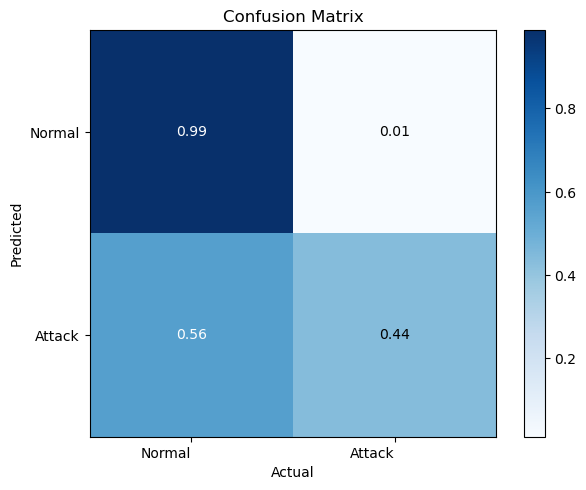



              precision    recall  f1-score   support

           0       0.64      0.99      0.78      5161
           1       0.97      0.44      0.60      5108

    accuracy                           0.71     10269
   macro avg       0.81      0.71      0.69     10269
weighted avg       0.81      0.71      0.69     10269

[[5101   60]
 [2876 2232]]




In [24]:
show_confusion_matrix(gnb,x_test,y_test,y_test_pred_gnb)

**Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train) 
y_pred_lr = lr.predict(x_test)

In [26]:
print("Train score is:", lr.score(x_train, y_train))
print("Test score is:", lr.score(x_test, y_test))

Train score is: 0.901711586687118
Test score is: 0.9107994936215795


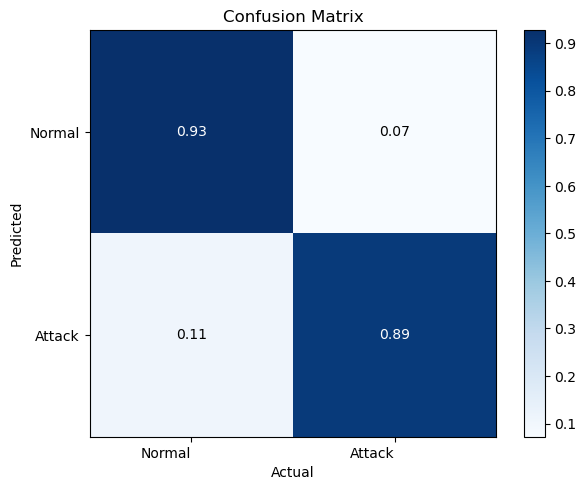



              precision    recall  f1-score   support

           0       0.90      0.93      0.91      5161
           1       0.92      0.89      0.91      5108

    accuracy                           0.91     10269
   macro avg       0.91      0.91      0.91     10269
weighted avg       0.91      0.91      0.91     10269

[[4787  374]
 [ 542 4566]]




In [27]:
show_confusion_matrix(lr,x_test,y_test,y_pred_lr)

**Support Vector Classifier (SVC)**

In [28]:
from sklearn.svm import SVC

In [29]:
svc = SVC(gamma='auto')
svc.fit(x_train, y_train) 
y_pred_svc = svc.predict(x_test)

In [30]:
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(gamma='auto')

In [31]:
print("Train score is:", svc.score(x_train, y_train))
print("Test score is:", svc.score(x_test, y_test))

Train score is: 0.9922820344265089
Test score is: 0.9918200408997955


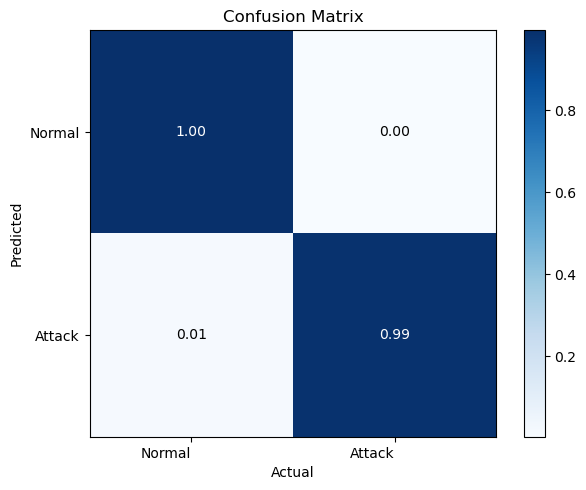



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5161
           1       1.00      0.99      0.99      5108

    accuracy                           0.99     10269
   macro avg       0.99      0.99      0.99     10269
weighted avg       0.99      0.99      0.99     10269

[[5142   19]
 [  65 5043]]




In [32]:
show_confusion_matrix(svc,x_test,y_test,y_pred_svc)

**Ensemble Classifier (GBC)**

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
  
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [34]:
y_pred_gbc = gbc.predict(x_test)

In [35]:
print("Train score is:", gbc.score(x_train, y_train))
print("Test score is:", gbc.score(x_test, y_test))

Train score is: 1.0
Test score is: 1.0


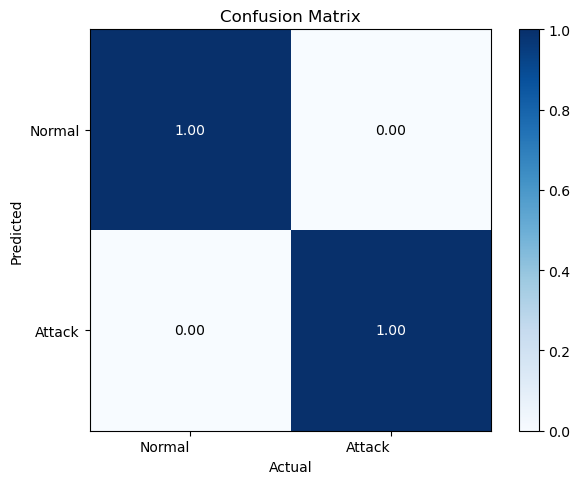



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5161
           1       1.00      1.00      1.00      5108

    accuracy                           1.00     10269
   macro avg       1.00      1.00      1.00     10269
weighted avg       1.00      1.00      1.00     10269

[[5161    0]
 [   0 5108]]




In [36]:
show_confusion_matrix(gbc,x_test,y_test,y_pred_gbc)

**Decision Tree (DT)**

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [38]:
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 2, shuffle = True, random_state = 10)

hyper_params = [ {'criterion' : ['gini', 'entropy'],
                     'max_depth': [None,1,2,3,4,5]}]


# specify model
model = DecisionTreeClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 2 folds for each of 12 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.120024,0.001615,0.006763,2.491474e-04,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.999854,1.000000,0.999927,0.000073,2,1.000000,1.000000,1.000000,0.000000
1,0.047579,0.000735,0.005767,2.031326e-04,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.838876,0.835849,0.837363,0.001513,11,0.835849,0.838876,0.837363,0.001513
2,0.066525,0.002356,0.005632,6.384850e-04,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.921410,0.921114,0.921262,0.000148,9,0.921114,0.921410,0.921262,0.000148
3,0.074832,0.000630,0.006196,2.256632e-04,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.967084,0.966303,0.966693,0.000390,6,0.966303,0.967084,0.966693,0.000390
4,0.090489,0.001209,0.005626,6.127357e-05,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.967084,0.966303,0.966693,0.000390,6,0.966303,0.967084,0.966693,0.000390
5,0.100714,0.000133,0.005638,3.145933e-04,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.997468,0.997078,0.997273,0.000195,3,0.997565,0.997322,0.997444,0.000122
6,0.097582,0.000483,0.006893,4.501343e-04,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",1.000000,1.000000,1.000000,0.000000,1,1.000000,1.000000,1.000000,0.000000
7,0.048834,0.004324,0.005021,1.204014e-05,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.838876,0.835849,0.837363,0.001513,11,0.835849,0.838876,0.837363,0.001513
8,0.061371,0.001511,0.005000,3.576279e-07,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.877051,0.877922,0.877486,0.000435,10,0.877922,0.877051,0.877486,0.000435
9,0.072863,0.000208,0.005833,2.657175e-04,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.924819,0.923500,0.924159,0.000659,8,0.923500,0.924819,0.924159,0.000659


In [39]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 1.0 corresponding to hyperparameters {'criterion': 'entropy', 'max_depth': None}


In [40]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
# use the model to make predictions with the test data
y_pred_dt = dtree.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_dt).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_dt)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 0
Accuracy: 1.00


In [41]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
x.columns

[[5161    0]
 [   0 5108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5161
           1       1.00      1.00      1.00      5108

    accuracy                           1.00     10269
   macro avg       1.00      1.00      1.00     10269
weighted avg       1.00      1.00      1.00     10269



Index(['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
       'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
       'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'switch_1',
       'switch_10', 'switch_2', 'switch_3', 'switch_4', 'switch_5', 'switch_6',
       'switch_7', 'switch_8', 'switch_9', 'src_1', 'src_10', 'src_11',
       'src_12', 'src_13', 'src_14', 'src_15', 'src_16', 'src_17', 'src_18',
       'src_2', 'src_20', 'src_3', 'src_4', 'src_5', 'src_6', 'src_7', 'src_8',
       'src_9', 'Protocol_ICMP', 'Protocol_TCP', 'Protocol_UDP', 'dst_1',
       'dst_10', 'dst_11', 'dst_12', 'dst_13', 'dst_14', 'dst_15', 'dst_16',
       'dst_17', 'dst_2', 'dst_3', 'dst_4', 'dst_5', 'dst_6', 'dst_7', 'dst_8',
       'dst_9', 'port_no_1', 'port_no_2', 'port_no_3', 'port_no_4',
       'port_no_5'],
      dtype='object')

**Artificial Neural Network (ANN)**

In [42]:
from keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
# Define the model layers
dense_1 = Dense(25, activation='tanh')
dense_2 = Dense(8, activation='selu')
dense_3 = Dense(25, activation='tanh')

# Input layer with shape (71,) as specified in the error message
inputs = Input(shape=(70,))  # Adjust the input shape to match the actual number of features (70)

# Create the model architecture
dense_x1 = dense_1(inputs)
dense_x2 = dense_2(dense_x1)
dense_x3 = dense_3(dense_x2)
outputs = Dense(1, activation='linear', name='reconstruction')(dense_x3)

# Compile the model
model_ann = Model(inputs=inputs, outputs=outputs)
model_ann.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_ann.summary()

# Assuming x_train, y_train, x_test, y_test are already defined with the correct shapes

# Train the model
filepath = "best_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Ensure x_train and x_test have the correct shapes
history = model_ann.fit(x_train, y_train, epochs=50, batch_size=400, 
                        callbacks=callbacks_list, validation_data=(x_test, y_test), verbose=1)




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 70)]              0         
                                                                 
 dense (Dense)               (None, 25)                1775      
                                                                 
 dense_1 (Dense)             (None, 8)                 208       
                                                                 
 dense_2 (Dense)             (None, 25)                225       
                                                                 
 reconstruction (Dense)      (None, 1)                 26        
                                                                 
Total params: 2234 (8.73 KB)
Trainable params: 2234 (8.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


 97/103 [=====

C:\Users\Hp\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 79/103 [======================>.......] - ETA: 0s - loss: 0.0554 - accuracy: 0.9510
Epoch 2: val_accuracy improved from 0.93485 to 0.97254, saving model to best_weights.hdf5
103/103 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9548 - val_loss: 0.0347 - val_accuracy: 0.9725
Epoch 3/50
103/103 [==============================] - ETA: 0s - loss: 0.0288 - accuracy: 0.9780
Epoch 3: val_accuracy improved from 0.97254 to 0.98491, saving model to best_weights.hdf5
103/103 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9780 - val_loss: 0.0219 - val_accuracy: 0.9849
Epoch 4/50
101/103 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9862
Epoch 4: val_accuracy improved from 0.98491 to 0.98734, saving model to best_weights.hdf5
103/103 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9862 - val_loss: 0.0161 - val_accuracy: 0.9873
Epoch 5/50
 78/103 [=====================>........] - ETA: 0

In [44]:
model_ann.evaluate(x_test,y_test)

321/321 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9981


[0.0018937723943963647, 0.9980524182319641]

In [45]:
predict = model_ann.predict(x_test)
predict= np.round(predict)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

321/321 [==============================] - 1s 1ms/step
[[5155    6]
 [  14 5094]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5161
           1       1.00      1.00      1.00      5108

    accuracy                           1.00     10269
   macro avg       1.00      1.00      1.00     10269
weighted avg       1.00      1.00      1.00     10269



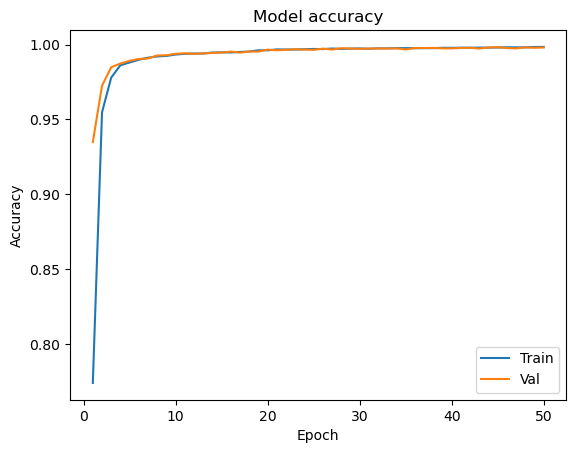

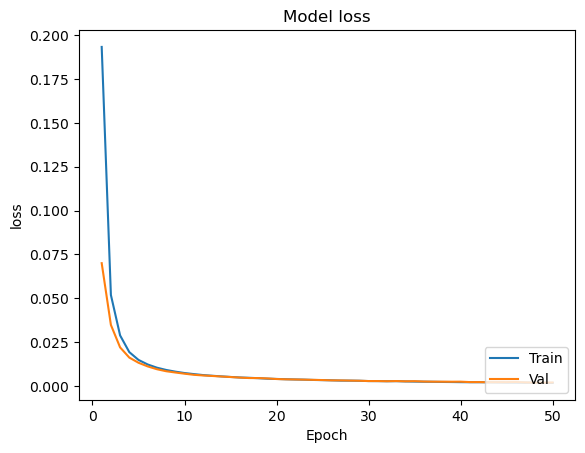

In [46]:
epochs=50
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['accuracy'])
    plt.plot(epochs_range,history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

**Deep Learning - Long short-term memory (LSTM)**

In [47]:
from keras.layers import LSTM, Dropout, Activation, Dense
from keras.models import Sequential

In [48]:
print("Before reshape - x_train shape:", x_train.shape)

Before reshape - x_train shape: (41073, 70)


In [49]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [50]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (41073, 70, 1)
Shape of x_test: (10269, 70, 1)


In [51]:
print('Build model...')
model = Sequential()
model.add(LSTM(80, return_sequences=False, input_shape=(70,1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

Build model...


In [52]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [53]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
642/642 [==============================] - 24s 35ms/step - loss: 0.5997 - acc: 0.6641 - val_loss: 0.4819 - val_acc: 0.7770
Epoch 2/20
642/642 [==============================] - 22s 34ms/step - loss: 0.4821 - acc: 0.7745 - val_loss: 0.3688 - val_acc: 0.8524
Epoch 3/20
642/642 [==============================] - 22s 34ms/step - loss: 0.2601 - acc: 0.8963 - val_loss: 0.1574 - val_acc: 0.9481
Epoch 4/20
642/642 [==============================] - 22s 34ms/step - loss: 0.1520 - acc: 0.9517 - val_loss: 0.0987 - val_acc: 0.9750
Epoch 5/20
642/642 [==============================] - 22s 35ms/step - loss: 0.1445 - acc: 0.9566 - val_loss: 0.1221 - val_acc: 0.9650
Epoch 6/20
642/642 [==============================] - 22s 35ms/step - loss: 0.0921 - acc: 0.9716 - val_loss: 0.0986 - val_acc: 0.9722
Epoch 7/20
642/642 [==============================] - 22s 34ms/step - loss: 0.0821 - acc: 0.9733 - val_loss: 0.0642 - val_acc: 0.9797
Epoch 8/20
642/642 [==============================] - 22s 34ms

In [54]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

321/321 [==============================] - 3s 11ms/step - loss: 0.0419 - acc: 0.9852
Accuracy: 98.52%


In [55]:
y_pred = model.predict(x_test)
predict= np.round(y_pred)
confusion_matrix(y_test,predict)
print('\n')
print(classification_report(y_test,predict))

321/321 [==============================] - 4s 11ms/step


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5161
           1       0.99      0.98      0.99      5108

    accuracy                           0.99     10269
   macro avg       0.99      0.99      0.99     10269
weighted avg       0.99      0.99      0.99     10269



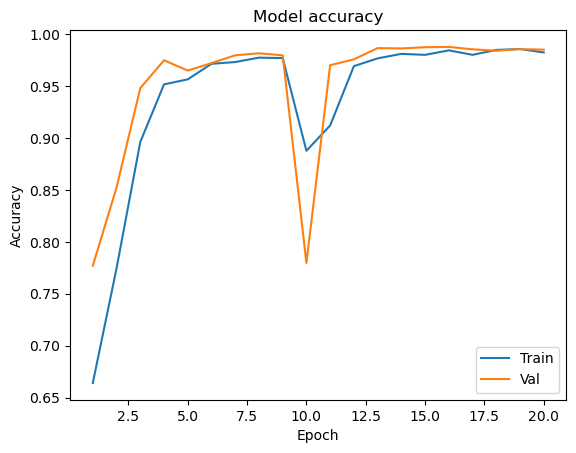

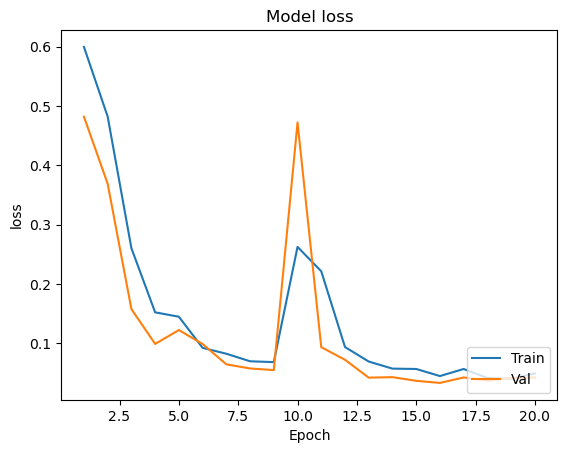

In [56]:
epochs=20
def plot_learningCurve(history,epochs):
    #Plot training and validation accuracy values
    epochs_range=range(1,epochs+1)
    plt.plot(epochs_range,history.history['acc'])
    plt.plot(epochs_range,history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
    #Plot training and validation loss values
    plt.plot(epochs_range,history.history['loss'])
    plt.plot(epochs_range,history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'],loc='lower right')
    plt.show()
plot_learningCurve(history,epochs)

**Analysis**

In [57]:
from sklearn.metrics import roc_curve, auc

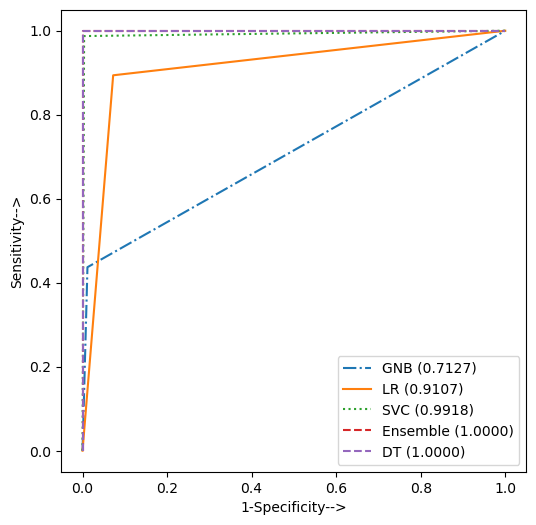

In [58]:
l_fpr, l_tpr, threshold1 = roc_curve(y_test, y_pred_lr)
g_fpr, g_tpr, threshold2 = roc_curve(y_test, y_test_pred_gnb)
e_fpr, e_tpr, threshold3 = roc_curve(y_test, y_pred_gbc)
s_fpr, s_tpr, threshold4 = roc_curve(y_test, y_pred_svc)
d_fpr, d_tpr, threshold4 = roc_curve(y_test, y_pred_dt)


auc_l = auc(l_fpr, l_tpr)
auc_s = auc(s_fpr, s_tpr)
auc_g = auc(g_fpr, g_tpr)
auc_e = auc(e_fpr, e_tpr)
auc_d = auc(d_fpr, d_tpr)


plt.figure(figsize=(6,6), dpi=100)
plt.plot(g_fpr, g_tpr, linestyle='-.', label='GNB (%.4f)' %auc_g)
plt.plot(l_fpr, l_tpr, linestyle='-', label='LR (%.4f)' %auc_l)
plt.plot(s_fpr, s_tpr, linestyle=':', label='SVC (%.4f)' %auc_s)
plt.plot(e_fpr, e_tpr, linestyle='--', label='Ensemble (%.4f)' %auc_e)
plt.plot(d_fpr, d_tpr, linestyle='--', label='DT (%.4f)' %auc_d)

plt.xlabel('1-Specificity-->')
plt.ylabel('Sensitivity-->')
plt.legend()

plt.show()

# Hybrid Model 

In [59]:
print("Shape of x_train:", x_train.shape)

Shape of x_train: (41073, 70, 1)


321/321 [==============================] - 1s 2ms/step
Accuracy of Hybrid Model: 1.0


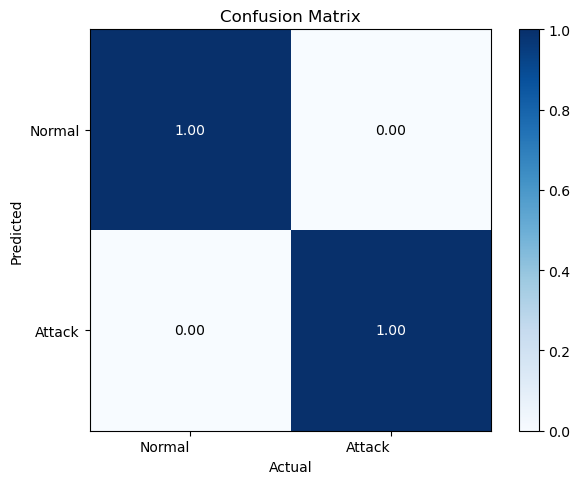



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5161
           1       1.00      1.00      1.00      5108

    accuracy                           1.00     10269
   macro avg       1.00      1.00      1.00     10269
weighted avg       1.00      1.00      1.00     10269

[[5161    0]
 [   0 5108]]




In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Reshaping x_train into a 2D array
x_train_2d = x_train.reshape(x_train.shape[0], -1)

# Reshaping x_test into a 2D array
x_test_2d = x_test.reshape(x_test.shape[0], -1)

# Generating predictions from individual models for both training and test data
gbc_train_pred = gbc.predict(x_train_2d)
svc_train_pred = svc.predict(x_train_2d)
ann_train_pred = model_ann.predict(x_train_2d)

gbc_test_pred = gbc.predict(x_test_2d)
svc_test_pred = svc.predict(x_test_2d)
ann_test_pred = model_ann.predict(x_test_2d)

# Feature Engineering - Creating new features based on model predictions
train_engineered_features = np.column_stack((gbc_train_pred, svc_train_pred, ann_train_pred))
test_engineered_features = np.column_stack((gbc_test_pred, svc_test_pred, ann_test_pred))

# Combining original features with engineered features
x_train_combined = np.column_stack((x_train_2d, train_engineered_features))
x_test_combined = np.column_stack((x_test_2d, test_engineered_features))

# Training a Passive Aggressive Classifier
hybrid_classifier = PassiveAggressiveClassifier()
hybrid_classifier.fit(x_train_combined, y_train)

# Evaluating the hybrid model
hybrid_pred = hybrid_classifier.predict(x_test_combined)

# Evaluate the performance of the hybrid model
print("Accuracy of Hybrid Model:", accuracy_score(y_test, hybrid_pred))

# Show confusion matrix and classification report for the hybrid model
show_confusion_matrix(hybrid_classifier, x_test_combined, y_test, hybrid_pred)


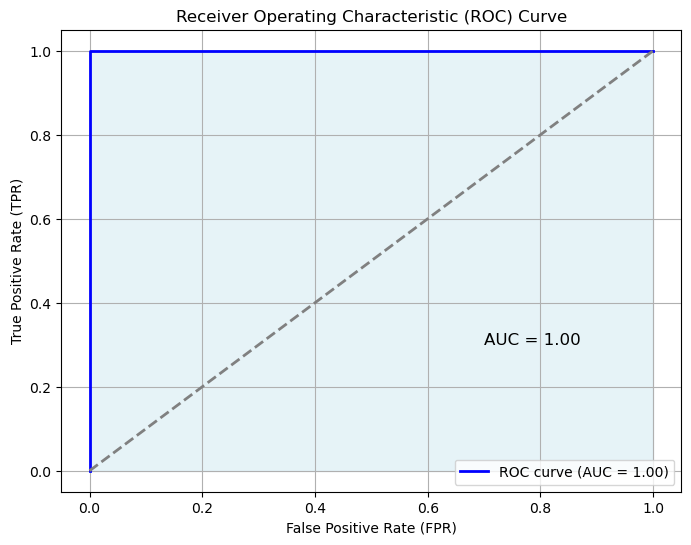

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Getting the decision scores for the positive class (class 1)
decision_scores = hybrid_classifier.decision_function(x_test_combined)

# Converting decision scores to probabilities
probabilities = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())

# Calculating the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculating the AUC score
auc_score = roc_auc_score(y_test, probabilities)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Plotting the AUC graph
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.3)
plt.text(0.7, 0.3, f'AUC = {auc_score:.2f}', fontsize=12)
plt.show()
